> by Cengizhan Aydin (cay7466) and Viktoriia Simakova (vsi3776)

# Computer Vision CNNs Notebook

This notebook contains exercises for the computer vision CNNs material.

In [1]:
import tensorflow as tf
import pickle, bz2
from sklearn.model_selection import train_test_split

In [3]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/kth_tips.pbz2 -o kth_tips.pbz2


Saved under kth_tips.pbz2


In [3]:
with bz2.BZ2File('./kth_tips.pbz2', 'rb') as fd:
    kth_dataset = pickle.load(fd)

X_train, X_test, Y_train, Y_test = train_test_split(kth_dataset['X'], kth_dataset['Y'], random_state=12345)
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

X_train = X_train / 255
X_test = X_test / 255

### Exercise 1 - Classify Image Dataset with Conventional Neural Network

I have provided you with an image dataset (the same we used in the Local Binary Patterns exercise). Your images are in
X_train, X_test while youre labels are in Y_train, Y_test.

Your job is to train a neural network on the pixel values to classify the images. To do so:
* Reshape the images from $(n,200,200)$ to $(n,40000)$
* Create a neural network model using keras
* Train your neural network on the (X_train, Y_train) and validate on the (X_test, Y_test) data.
* Compare your results with the LBP-results (if you have them)
* Explain what happened




In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# 1) Reshape the images from (n,200,200) to (n,40000)
X_train = X_train.reshape(X_train.shape[0], 40000)
X_test = X_test.reshape(X_test.shape[0], 40000)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(607, 200, 200) (607, 10) (203, 200, 200) (203, 10)
(607, 40000) (607, 10) (203, 40000) (203, 10)


In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 2) Create a neural network model with keras
nn = Sequential()
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(10, activation='relu'))

In [8]:
# 3) train the neural network on the (X_train, Y_train) data and validate on (X_test, Y_test)
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0949 - loss: 4.8453 - val_accuracy: 0.1084 - val_loss: 5.1214
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0787 - loss: 5.0037 - val_accuracy: 0.0985 - val_loss: 5.1287
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0995 - loss: 5.0189 - val_accuracy: 0.1084 - val_loss: 5.1266
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0888 - loss: 4.9787 - val_accuracy: 0.0739 - val_loss: 5.1243
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1315 - loss: 4.8214 - val_accuracy: 0.0837 - val_loss: 5.1301
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1005 - loss: 4.4706 - val_accuracy: 0.0936 - val_loss: 5.1261
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0927 - loss: 4.7060 - val_accuracy: 0.1084 - val_loss: 5.1263
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0933 - loss: 4.8780 - val_accuracy: 0.0739 - v

In [9]:
_, accuracy = nn.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0889 - loss: 5.1555 
Accuracy: 7.39


#### Answers Exercise 1

- Explain what happened
  - The Dense Layers of NN are not really suited to handle image data.
  - The Data is very highly correlated and the high input dimension makes it even harder to find patterns for the NN
  - CNNs would be far better suited for their weight sharing and local connectivity to handle patterns at different positions inside pictures better

<img src="https://i.redd.it/groh5ts7el941.png" />

### Exercise 2: Convolutional Layer

In the cell below, I have provided you with a very simple CNN consisting only of a single convolutional layer.
You can access the weights (kernels) of a keras model by accessing the layer with:

```python
kernel_list = cnn.layers[0].get_weights() # This gives us a list of kernels in the layer
```


Experiment with different parameters for ```filters, kernel_size``` and ```input_shape``` and have
a look at the kernels to get a solid understanding of how these kernels a CNN uses look like.

Answer the following questions:
* How are the kernel dimensions influenced by the input dimensions?
* How is the number of parameters in the network influenced by the input dimension, the kernel size and the number of filters?
* Explain and summarize your findings.

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer

In [11]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))

cnn.summary()

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 1)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 2)    │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(128,128,6)))
cnn.add(Conv2D(filters=1, kernel_size=(10,10)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))

cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 119, 119, 1)    │           601 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 117, 117, 2)    │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621 (2.43 KB)

 Trainable params: 621 (2.43 KB)

 Non-trainable params: 0 (0.00 B)

#### Answers Exercise 2
* How are the kernel dimensions influenced by the input dimensions?
  * as long as the kernel fits into the input and the depth isn't changed, they don't change
* How is the number of parameters in the network influenced by the input dimension, the kernel size and the number of filters?
  * $kernelSize * filterCount = paramterCount$
  * input dimension does not change parameter count, only the output shape
* Explain and summarize your findings.
  * CNNs are for better suited for image data then regular NNs

### Exercise 3 - Pooling Layer

Create a convolutional neural network with two convolution layers followed by pooling layers (use either max pooling or average pooling).

Experiment with different values for ```pool_size, strides``` and study how the output shape is affected.
Answer the following questions:
* What is the difference in output size between max pooling and average pooling? Why?
* What is the impact on the receptive field of a convolutional layer following a pooling layer?
* How is the amount of parameters affected by a pooling layer?


In [13]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer

cnn = Sequential()

cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 1)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 2)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.layers import AveragePooling2D, Conv2D, InputLayer

cnn = Sequential()
cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
cnn.add(AveragePooling2D(pool_size=(2,2)))

cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 1)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 1)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 30, 30, 2)      │             0 │
│ (AveragePooling2D)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

#### Answers Exercise 3
* What is the difference in output size between max pooling and average pooling? Why?
  * Output size is the same
  * only changing the input values and the pool size changes the output
* What is the impact on the receptive field of a convolutional layer following a pooling layer?
  * the receptive field increases
* How is the amount of parameters affected by a pooling layer?
  * not affected at all

### Exercise 4: Flatten and GlobalAveragePooling

In this exercise we will study two methods we can use to transfrom multi-dimensional feature maps to one-dimensional feature maps as used as input for Dense layers.

1. Create a convolution neural network using two convolutional layers.
    * Use a Flatten layer to transform your multi-dimensional feature map to a one-dimensional feature map.
    * Add a Dense output layer for a classification problem with 10 classes.
    * Where is the majority of the weights in your network architecture?
    * How could this influence the training of your network?

2. Create a convolution neural network using two convolutional layers.
    * Use a GlobalAveragePooling2D layer to transform your multi-dimensional feature map to a one-dimensional feature map.
    * Create a network architecture for a classification problem with 10 classes without using a Dense layer.
    * Where is the majority of weights in your network architecture?
    * How could this influence the training of your network?

    


In [14]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, InputLayer
from tensorflow.keras.models import Sequential

# 1. Create a convolution neural network using two convolutional layers.
#     * Use a Flatten layer to transform your multi-dimensional feature map to a one-dimensional feature map.
#     * Add a Dense output layer for a classification problem with 10 classes.

cnn = Sequential()

cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))

cnn.add(Flatten())

cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 124, 124, 1)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 122, 122, 2)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       297,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,786 (1.14 MB)

 Trainable params: 297,786 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

#### Answers Exercise 4_1

1. Create a convolution neural network using two convolutional layers.
    * ~~Use a Flatten layer to transform your multi-dimensional feature map to a one-dimensional feature map.~~
    * ~~Add a Dense output layer for a classification problem with 10 classes.~~
    * Where is the majority of the weights in your network architecture?
      * _the dense layer_
    * How could this influence the training of your network?
      * _overfitting because of the sheer amounts of weights_

In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, InputLayer, Dense
from tensorflow.keras.models import Sequential

# 2. Create a convolution neural network using two convolutional layers.
#     * Use a GlobalAveragePooling2D layer to transform your multi-dimensional feature map to a one-dimensional feature map.
#     * Create a network architecture for a classification problem with 10 classes without using a Dense layer.

cnn = Sequential()

cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
cnn.add(GlobalAveragePooling2D())
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 124, 124, 1)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 122, 122, 2)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

#### Answers 4_2

2. Create a convolution neural network using two convolutional layers.
    * ~~Use a GlobalAveragePooling2D layer to transform your multi-dimensional feature map to a one-dimensional feature map.~~
    * ~~Create a network architecture for a classification problem with 10 classes without using a Dense layer.~~
    * Where is the majority of weights in your network architecture?
      * _the first conv2D layer_
    * How could this influence the training of your network?
      * _this is more suited for training the network because now the filters in the conv layers are able to identify patterns_

### Exercise 5: Classification using CNNS


In the first exercise in this notebook we already downloaded and prepared the KTH-TIPS dataset we used previously for classification. We saw that using a conventional NN
did not work very well in this scenario.

1. Create a CNN of your choice to train a classifier for the provided dataset.
    * Train on (X_train, Y_train), Validate on (X_test, Y_test) (you can specify validation_data in the ```model.fit()``` function of keras)
2. Compare using Flatten() and GlobalAveragePooling() for feeding your features into Dense layers
    * How does it effect the number of parameters, the accuracy of your results and the time used to train the models?
3. What is the highest accuracy you can reach with the smallest amount of parameters?




In [24]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, InputLayer, Dense, MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import Sequential

In [16]:
with bz2.BZ2File('./kth_tips.pbz2', 'rb') as fd:
    kth_dataset = pickle.load(fd)

X_train, X_test, Y_train, Y_test = train_test_split(kth_dataset['X'], kth_dataset['Y'], random_state=12345)
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

X_train = X_train / 255
X_test = X_test / 255

In [21]:
max_cnn = Sequential()

max_cnn.add(InputLayer(input_shape=(200,200,1)))
max_cnn.add(MaxPooling2D(pool_size=(2,2)))
max_cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
max_cnn.add(MaxPooling2D(pool_size=(2,2)))
max_cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
max_cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
max_cnn.add(GlobalAveragePooling2D())
max_cnn.add(Dense(10, activation='softmax'))

max_cnn.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

history_max_cnn = max_cnn.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test))

Epoch 1/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0947 - loss: 2.3074 - val_accuracy: 0.1084 - val_loss: 2.3009
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0858 - loss: 2.3013 - val_accuracy: 0.1133 - val_loss: 2.3008
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1182 - loss: 2.3009 - val_accuracy: 0.1626 - val_loss: 2.3010
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1284 - loss: 2.2995 - val_accuracy: 0.1133 - val_loss: 2.3004
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1349 - loss: 2.2997 - val_accuracy: 0.1626 - val_loss: 2.3000
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1549 - loss: 2.3008 - val_accuracy: 0.1527 - val_loss: 2.2995
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1788 - loss: 2.2987 - val_accuracy: 0.1724 - val_loss: 2.2990
Epoch 8/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1696 - loss: 2.3000 - val_accuracy: 0.1576 - 

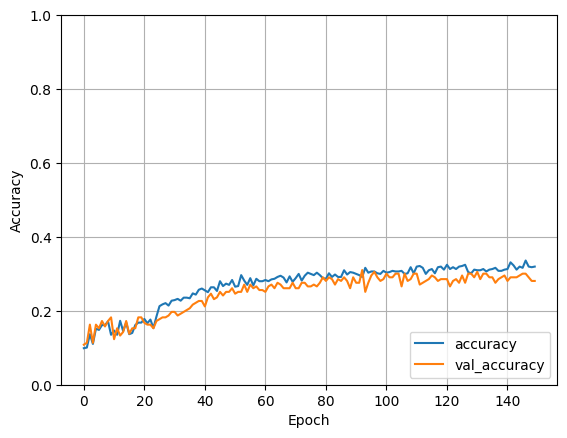

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_max_cnn.history['accuracy'], label='accuracy')
plt.plot(history_max_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [25]:
flatten_cnn = Sequential()

flatten_cnn.add(InputLayer(input_shape=(200,200,1)))
flatten_cnn.add(AveragePooling2D(pool_size=(2,2)))
flatten_cnn.add(Conv2D(filters=1, kernel_size=(5,5)))
flatten_cnn.add(AveragePooling2D(pool_size=(2,2)))
flatten_cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
flatten_cnn.add(Conv2D(filters=2, kernel_size=(3,3)))
flatten_cnn.add(Flatten())
flatten_cnn.add(Dense(10, activation='softmax'))

flatten_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_flatten_cnn = flatten_cnn.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test))

Epoch 1/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0970 - loss: 2.3071 - val_accuracy: 0.0936 - val_loss: 2.2838
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2677 - loss: 2.2016 - val_accuracy: 0.1724 - val_loss: 2.2405
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4178 - loss: 2.0573 - val_accuracy: 0.2463 - val_loss: 2.1327
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5737 - loss: 1.8302 - val_accuracy: 0.3054 - val_loss: 1.9555
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6363 - loss: 1.6123 - val_accuracy: 0.3645 - val_loss: 1.8107
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6846 - loss: 1.3554 - val_accuracy: 0.4335 - val_loss: 1.7102
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7768 - loss: 1.2173 - val_accuracy: 0.4631 - val_loss: 1.6865
Epoch 8/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7854 - loss: 1.1015 - val_accuracy: 0.4631 - 

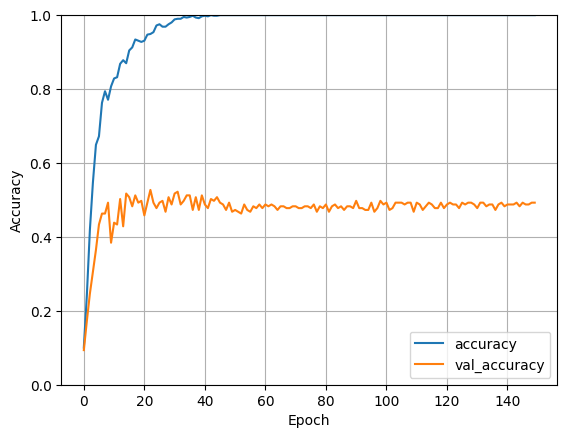

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_flatten_cnn.history['accuracy'], label='accuracy')
plt.plot(history_flatten_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Answers Excercise 5

2. Compare using Flatten() and GlobalAveragePooling() for feeding your features into Dense layers
   * How does it effect the number of parameters, the accuracy of your results and the time used to train the models?
     * _Flatten increases the Parameters so much that it leads to overfitting and therefore worse accuracy_
     * _The time is almost identical for both versions_
     * _Flatten gets a faked accuracy by overfitting eventhough the actual accuracy is still higher_
3. What is the highest accuracy you can reach with the smallest amount of parameters?
   * Use Optimizations like
     * droput
     * L2-Regularization
   * experiment with
     * layer size
     * layer count
     * kernel size
     * ...
   * there is no "perfect CNN"